In [6]:
import torch
from torch import nn
import matplotlib
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np


# Leaning heavily on: https://cv-tricks.com/keras/understand-implement-resnets/

In [16]:
imagedir = "/home/apower/data/oxford-iiit-pet/breeds"

# https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
transform = transforms.Compose([transforms.Resize(256),        
                                transforms.CenterCrop(224),    
                                transforms.ToTensor(),         
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],    
                                                     std=[0.229, 0.224, 0.225])
                               ])

dataset = torchvision.datasets.ImageFolder(imagedir, transform)
num_total_pics = len(dataset)
num_test_pics = int(min(num_total_pics * .1, 1000))
num_dev_pics = int(min(num_total_pics * .1, 1000))
num_train_pics = num_total_pics - (num_dev_pics + num_test_pics)
(train_set, dev_set, test_set) = torch.utils.data.random_split(dataset, (num_train_pics, num_dev_pics, num_test_pics))

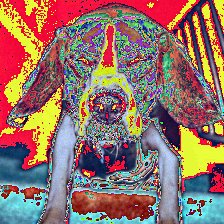

In [8]:
X_train[0][0]

to_pic = torchvision.transforms.ToPILImage()
to_pic(X_train[0][0])

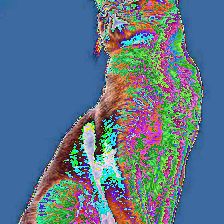

In [9]:
to_pic(X_dev[0][0])

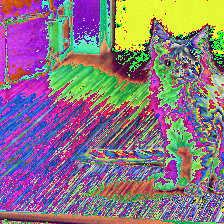

In [10]:
to_pic(X_test[0][0])

In [11]:
print('training_set:', len(X_train), '\ndev_set:', len(X_dev), '\ntest_set:', len(X_test))

training_set: 5912 
dev_set: 739 
test_set: 739


In [13]:
model = torchvision.models.resnet18(pretrained=False, progress=True)

for p in model.parameters():
    print(p)

Parameter containing:
tensor([[[[-1.6015e-02, -6.5303e-03,  6.5079e-03,  ..., -9.4920e-03,
            3.5755e-03,  4.4505e-02],
          [-2.3067e-02, -2.5026e-02, -3.0877e-02,  ..., -3.7503e-02,
           -6.1233e-03,  8.1206e-03],
          [-4.0878e-02, -1.0782e-02,  1.1430e-02,  ..., -2.6940e-02,
            1.5374e-02, -2.8749e-02],
          ...,
          [-4.9608e-02, -6.9684e-03, -4.9946e-02,  ..., -3.3960e-02,
            2.7338e-02,  4.9047e-02],
          [ 3.0032e-02, -1.3626e-02, -1.6878e-02,  ..., -3.6273e-02,
           -7.1445e-03,  5.2392e-03],
          [ 3.1332e-02,  2.2596e-02,  8.9508e-03,  ...,  2.0336e-02,
            9.4295e-03, -3.4246e-02]],

         [[-4.1206e-02, -6.5811e-03, -1.6622e-02,  ..., -8.0510e-03,
            6.9499e-03, -1.4178e-02],
          [ 6.1290e-02,  5.0450e-02, -1.8281e-02,  ..., -1.6529e-02,
           -5.2722e-02,  3.3288e-02],
          [ 1.6045e-02, -1.5318e-02,  7.9050e-03,  ...,  6.5810e-02,
           -5.9096e-02,  1.7964e-02]

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
epochs = 100

losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y)
    print('epoch:', i, 'loss:', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

NameError: name 'X' is not defined

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
plot_fit('end')

In [ ]:
#resnet = torchvision.models.resnet50(pretrained=False, progress=True)
root = "/home/apower/data/oxford-iiit-pet/breeds"

# https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
transform = transforms.Compose([transforms.Resize(256),        
                                transforms.CenterCrop(224),    
                                transforms.ToTensor(),         
                                transforms.Normalize(          
                                mean=[0.485, 0.456, 0.406],    
                                std=[0.229, 0.224, 0.225]      
                                )])

dataset = torchvision.datasets.ImageFolder(root, transform)


In [ ]:
def forward(x):
    y = w * x + b
    return y


In [ ]:



model = nn.Linear(in_features=1, out_features=1)
x = torch.tensor([[2.0], [3.3]])


class ConvLayer(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init()
        self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)

    def forward(self, x):
        return self.conv2d(x)

class SoftMax(nn.Softmax):

    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init()
        self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)

    def forward(self, x):
        return self.conv2d(x)







#model = torchvision.models.resnet50(pretrained=False, progress=True)

# Let's try something basic like Conv2d -> Conv2d -> Sigmoid


def forward(batch, ):
    Conv2d


model = Linear(in_features=1, out_features=1)